# **Installing and Importing Libraries**

In [ ]:
# Installing & Importing libraries
!pip install pyforest -q

  Preparing metadata (setup.py) ... done


In [ ]:
import pyforest
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#**Reading the data**

In [ ]:
df= pd.read_csv("ckd-v2.csv")
df.head(5)

<IPython.core.display.Javascript object>

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0.0,0.0,1.020,1.000,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,227.9450,1.0,1.0,11.999
1,0.0,0.0,1.010,-0.001,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,227.9450,1.0,1.0,11.999
2,0.0,0.0,1.010,4.001,1.0,1.0,-0.001,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,139.8635,1.0,1.0,11.999
3,1.0,1.0,1.010,3.000,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,139.8635,1.0,1.0,11.999
4,0.0,0.0,1.016,-0.001,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,139.8635,1.0,1.0,16.000


#**Implementing Features Engineering**

In [ ]:
# Adding both al_Sc ratio and bu_sc ratio
df["al_sc_ratio"]= df["al"] / df["sc"]
df["bu_sc_ratio"] = df["bu"] / df["sc"]

In [ ]:
df.head(5)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,cad,appet,pe,ane,grf,stage,affected,age,al_sc_ratio,bu_sc_ratio
0,0.0,0.0,1.020,1.000,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,227.9450,1.0,1.0,11.999,0.274048,13.181420
1,0.0,0.0,1.010,-0.001,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,227.9450,1.0,1.0,11.999,-0.000274,13.181420
2,0.0,0.0,1.010,4.001,1.0,1.0,-0.001,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,139.8635,1.0,1.0,11.999,1.096465,18.402302
3,1.0,1.0,1.010,3.000,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,139.8635,1.0,1.0,11.999,0.822143,13.181420
4,0.0,0.0,1.016,-0.001,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,139.8635,1.0,1.0,16.000,-0.000274,13.181420


#**Simple Data Check**

In [ ]:
na_records = df[df.isna().any(axis=1)]
na_records

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,cad,appet,pe,ane,grf,stage,affected,age,al_sc_ratio,bu_sc_ratio


In [ ]:
# Check for duplicates
duplicates = df[df.duplicated()]

# Print the duplicate rows
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


#**Read the Clusters Table**

In [ ]:
cluster_df= pd.read_csv("ckd2-cluster.csv")

<IPython.core.display.Javascript object>

In [ ]:
# Drop irrelevant clusters columns
columns_to_drop = [
    "km_lloyd_distortion_clusters",
    "km_lloyd_calinski_harabasz_clusters",
    "km_elkan_distortion_clusters",
    "km_elkan_silhouette_clusters",
    "km_elkan_calinski_harabasz_clusters"
]

cluster_df2= cluster_df.copy()
cluster_df2= cluster_df2.drop(columns= columns_to_drop)
cluster_df2.head(5)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,cad,appet,pe,ane,grf,stage,affected,age,sc_clusters,km_lloyd_silhouette_clusters
0,0.0,0.0,1.020,1.000,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,227.9450,1.0,1.0,11.999,7,6
1,0.0,0.0,1.010,-0.001,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,227.9450,1.0,1.0,11.999,7,6
2,0.0,0.0,1.010,4.001,1.0,1.0,-0.001,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,139.8635,1.0,1.0,11.999,1,0
3,1.0,1.0,1.010,3.000,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,139.8635,1.0,1.0,11.999,6,0
4,0.0,0.0,1.016,-0.001,1.0,0.0,-0.001,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,139.8635,1.0,1.0,16.000,5,6


#**Compare the Clusters**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

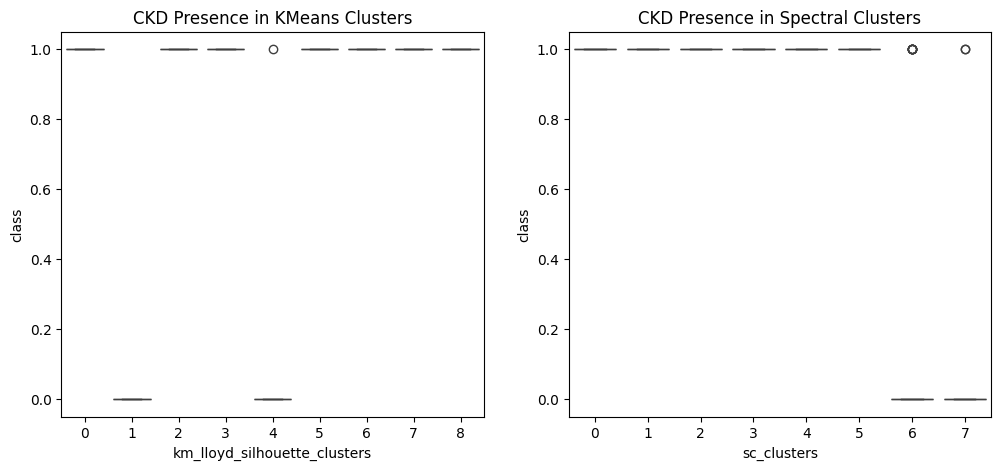

In [ ]:
# Visualizing CKD presence distribution in clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='km_lloyd_silhouette_clusters', y='class', data=cluster_df2)
plt.title('CKD Presence in KMeans Clusters')

plt.subplot(1, 2, 2)
sns.boxplot(x='sc_clusters', y='class', data=cluster_df2)
plt.title('CKD Presence in Spectral Clusters')

plt.show()

#**Data Quality Check**

In [ ]:
# Previously, we test the independency, normality and Homogeneity of Variance test
# Implement VIF to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"]= df.columns
vif_data["VIF"]= [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data)

<IPython.core.display.Javascript object>

           feature          VIF
0   bp (Diastolic)    11.900179
1         bp limit    12.599616
2               sg  1190.258381
3               al    28.090050
4            class          inf
5              rbc     1.975081
6               su     3.012516
7               pc     3.415817
8              pcc     2.207126
9               ba     1.500013
10             bgr    13.139799
11              bu   135.299025
12             sod   885.035418
13              sc   106.213016
14             pot    12.156482
15            hemo   123.777617
16             pcv   114.562428
17            rbcc    70.186792
18            wbcc    14.881129
19             htn     4.411535
20              dm     3.717352
21             cad     1.717733
22           appet     1.955467
23              pe     1.972468
24             ane     2.538460
25             grf    12.550571
26           stage    38.138442
27        affected          inf
28             age    19.607731
29     al_sc_ratio    26.451175
30     b

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# Apply log transformation
df2= df.copy()

# Identify numerical columns
numerical_columns= df2.select_dtypes(include= [np.number]).columns.tolist()

# Apply log transformation to all numerical columns
df2[numerical_columns]= df2[numerical_columns].apply(lambda x: np.log(x + 1))

# Display the transformed dataset
print("\nTransformed Data:")
print(df2.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Transformed Data:
   bp (Diastolic)  bp limit        sg        al     class       rbc        su  \
0        0.000000  0.000000  0.703098  0.693147  0.693147  0.000000 -0.001001   
1        0.000000  0.000000  0.698135 -0.001001  0.693147  0.000000 -0.001001   
2        0.000000  0.000000  0.698135  1.609638  0.693147  0.693147 -0.001001   
3        0.693147  0.693147  0.698135  1.386294  0.693147  0.000000 -0.001001   
4        0.000000  0.000000  0.701115 -0.001001  0.693147  0.000000 -0.001001   

         pc  pcc        ba  ...  cad     appet        pe  ane       grf  \
0  0.000000  0.0  0.000000  ...  0.0  0.000000  0.000000  0.0  5.433482   
1  0.000000  0.0  0.000000  ...  0.0  0.000000  0.000000  0.0  5.433482   
2  0.693147  0.0  0.693147  ...  0.0  0.693147  0.000000  0.0  4.947791   
3  0.000000  0.0  0.000000  ...  0.0  0.000000  0.000000  0.0  4.947791   
4  0.000000  0.0  0.000000  ...  0.0  0.693147  0.693147  0.0  4.947791   

      stage  affected       age  al_sc_rati

In [ ]:
# Prepare data for VIF calculation
X= df2[numerical_columns]

# Add a constant column for intercept
X= sm.add_constant(X)

# Calculate VIF for each predictor
transformed_vif_data= pd.DataFrame()
transformed_vif_data["feature"]= X.columns
transformed_vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the output
print("\nVIF after Transformation:")
print(transformed_vif_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


VIF after Transformation:
           feature           VIF
0            const  1.871162e+05
1   bp (Diastolic)  9.242992e+00
2         bp limit  1.082446e+01
3               sg  2.140369e+00
4               al  3.735517e+01
5            class           inf
6              rbc  1.717317e+00
7               su  2.686580e+00
8               pc  2.845253e+00
9              pcc  1.961955e+00
10              ba  1.458857e+00
11             bgr  2.382626e+00
12              bu  3.276196e+03
13             sod  1.939642e+00
14              sc  2.078389e+03
15             pot  1.948303e+00
16            hemo  5.980025e+00
17             pcv  4.868203e+00
18            rbcc  2.372586e+00
19            wbcc  1.363667e+00
20             htn  2.708637e+00
21              dm  2.517507e+00
22             cad  1.575281e+00
23           appet  1.572319e+00
24              pe  1.631641e+00
25             ane  2.206745e+00
26             grf  1.555811e+01
27           stage  1.913126e+01
28        affect

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


#**Exploring Mediation Analysis and Causal Inference**

#**Reflection:**

Let's take a moment to reflect my learning experience before we go straight to Machine Learning.

I remember when I first started my data science journey, I rushed to go after for the solution and build a machine learning model for eevry tasks I came across as I believe machine learning could solve everything.

Until someone told me that I should have focusing on understanding and communication, instead of insisting to go adavanced.

Since then, I took a very different approach, starting by paying more attention in understanding data, transforming data, understanding the impact of the transformation, and presenting insights using a structural approach, for example: The Minto Pyramid Framework.

Before I begin my journey in data science, I developed a strong interest in behavioral finance (also known as human behaviour in finance) during my finance studies.

Coming into data science, I brought the interest further into understanding the cause and the impact/effect. Knowing that correlation does not mean causation, I started explore outside of correlation, includes feature importance and predictive power score and other feature selection techiques in the past.

Despite all these techniques helped in selecting the important features for machine learning, they all have one key similarity, THEY DO NOT EXPLAIN THE RELATIONSHIP OF THE CAUSATION.

Therefore, in this particular project, I allocated significant amount of time with an objective of NOT TO FINISH THE TASK WITH A MACHINE LEARNING MODEL, BUT TO IDENTIFY THE EARLY INDICATOR AND UNDERSTANDING THE CAUSES OF CKD as the primary objective.

# **Let's Talk About Predictive Inference and Causal Inference**

Predictive inference often exploits correlations, therefore, machine learning itself should not misuse and misinterpret these correlations as causal relationships without proper causal analysis and domain expertise.

**Predictive Inference:**

Predictive inference is like being a weather forecaster. You look at patterns in past weather data (like temperature, humidity, and wind patterns) to guess what the weather will be like tomorrow or next week. **You're not saying why the weather will be that way**, just that based on what you've seen before, this is what you think will happen.

**Causal Inference:**

Causal inference is more like being a detective. You're not just trying to predict what will happen, but you want to understand why it happens. If you see that every time it rains, the sidewalk gets wet, you might conclude that rain causes the sidewalk to get wet. But you'd also consider other possibilities – like someone using a sprinkler – before you decide that rain is definitely the cause.

In simple terms:

- Predictive inference tries to guess what will happen next based on patterns.
- Causal inference tries to understand why things happen and what truly causes them.


#**WHY Causal Inference?**

The complexity of causal inference lies in the fact that we want to measure something that we will never actually observe.

Think about choosing between two restaurants for dinner. You pick one and enjoy your meal. Now, you might wonder: "Would I have had a better time at the other restaurant?" That's the heart of causal inference. We can never know for sure because we can't be in two places at once. We only experience the choice we made. Researchers face this same challenge when trying to understand the effects of things like new teaching methods or health treatments. They have to find ways to figure out what would have happened if a different choice had been made, even though they can't actually see that alternate reality. It's like piecing together a story when you only have half the pages.

#**So What is the KEY DIFFERENCES between predictive inference and causal inference?**

In Machine learning model, we usually pick the features which has the potential to improve the model's prediction quality, this is also why pps is used (predictive power score). In causal inference, we are trying to find out what causes CKD in your cases and will include these features even if the predictive power is low.

True Causal Inference goes a step further by attempting to establish cause-and-effect relationships in a more rigorous way. It typically requires data that includes different groups of people experiencing different scenarios or interventions. This helps to compare what happens when one group receives a certain treatment versus another group that does not, making it possible to isolate the true effect of the treatment.

Given the lack of such detailed and specific data in the CKD dataset, I found that implementing true causal inference is very challenging. These methods usually need data that can show different outcomes under different conditions, which was not available in my case.

Instead, I focused on mediation analysis that helps understanding the direct and indirect effects of variables within a causal pathway. For example, if exercise affects heart health, weight loss might be a mediator.


# **Defining key features With Domain Knowledge**

In [ ]:
# Define key features
model_features= {
    'ChatGPT': ['sc', 'grf', 'al', 'bu', 'dm'],
    'Preplexity': ['grf', 'sc', 'bp', 'dm', 'bu'],
    'Claude AI': ['grf', 'sc', 'bp', 'al', 'dm'],
    'My Analysis': ['grf', 'al', 'bu', 'pcv', 'hemo']
}

# Create DataFrame
data_features= pd.DataFrame(model_features)
data_features

<IPython.core.display.Javascript object>

,ChatGPT,Preplexity,Claude AI,My Analysis
0,sc,grf,grf,grf
1,grf,sc,sc,al
2,al,bp,bp,bu
3,bu,dm,al,pcv
4,dm,bu,dm,hemo


In [ ]:
df2.head(5)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,cad,appet,pe,ane,grf,stage,affected,age,al_sc_ratio,bu_sc_ratio
0,0.000000,0.000000,0.703098,0.693147,0.693147,0.000000,-0.001001,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,5.433482,0.693147,0.693147,2.564872,0.242199,2.651933
1,0.000000,0.000000,0.698135,-0.001001,0.693147,0.000000,-0.001001,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,5.433482,0.693147,0.693147,2.564872,-0.000274,2.651933
2,0.000000,0.000000,0.698135,1.609638,0.693147,0.693147,-0.001001,0.693147,0.0,0.693147,...,0.0,0.693147,0.000000,0.0,4.947791,0.693147,0.693147,2.564872,0.740252,2.965392
3,0.693147,0.693147,0.698135,1.386294,0.693147,0.000000,-0.001001,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,4.947791,0.693147,0.693147,2.564872,0.600013,2.651933
4,0.000000,0.000000,0.701115,-0.001001,0.693147,0.000000,-0.001001,0.000000,0.0,0.000000,...,0.0,0.693147,0.693147,0.0,4.947791,0.693147,0.693147,2.833213,-0.000274,2.651933


#**Exploring Logistic Regression- Basic Mediation Analysis**

# **Hemoglobin as Predictor**

In [ ]:
# Perform mediation analysis with a binary outcome (logistic regression)
# Exploring Mediation Analysis
!pip install pyprocessmacro -q
from pyprocessmacro import Process

# Supress any warnings
warnings.filterwarnings("ignore", category= DeprecationWarning)

# Model 1: HEMO> GRF > CLASS
model_1= Process(data= df2, model= 4, x= "hemo", y= "class", m= ["grf"], y_model= "logistic")
model_1_result= model_1.summary()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.5 MB/s eta 0:00:00
Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = hemo
    y = class
    m1 = grf

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1  df2  p-value
 0.6150   0.6090 0.0434 156.5249    2  196   0.0000

Coefficients

       coeff     se       t      p    LLCI    ULCI
Cons  3.0680 0.1785 17.1874 0.0000  2.7181  3.4178
hemo -0.7221 0.0894 -8.0765 0.0000 -0.8973 -0.5468
grf  -0.1935 0.0284 -6.8126 0.0000 -0.2491 -0.1378

---------------------------------------------------------

**Interpretation:**

1. A substantial portion of the variance (61.50%) in the class is explained by the both glomerular filteration rate (grf) and hemoglobin (hemo), indicating a strong model.

2. There is a strong and significant direct negative relationship (-0.7221) between hemoglobin and class, suggesting that as hemoglobin decreases, it increase the likelihood of having CKD.

3. There is a strong and significant indirect negative relationship (-0.3931) between hemoglobin and class via glomerular filteration rate, suggesting that lower hemoglobin lead to lower glomerular filteration rate, and thus increase the likelihood of CKD.


In [ ]:
# Model 2: HEMO> AL> CLASS
model_2= Process(data= df2, model= 4, x= "hemo", y= "class", m= ["al"], y_model= "logistic")
model_2_result= model_2.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = hemo
    y = class
    m1 = al

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1  df2  p-value
 0.6031   0.5969 0.0447 148.8833    2  196   0.0000

Coefficients

       coeff     se        t      p    LLCI    ULCI
Cons  2.5695 0.2125  12.0902 0.0000  2.1530  2.9861
hemo -0.8653 0.0800 -10.8138 0.0000 -1.0222 -0.7085
al    0.1782 0.0285   6.2557 0.0000  0.1224  0.2341

-------------------------------------------------------------------------

Outcome = al 
OLS Regression Summary

     R²  Adj. R²   

**Interpretation:**

1. A substantial portion of the variance (60.31%) in the class is explained by the both hemoglobin (hemo) and albumin (al), indicating a strong model.

2. There is a strong and significant direct negative relationship (-0.8653) between hemoglobin and class, suggesting that as hemoglobin decreases, it increase the likelihood of having CKD.

3. There is a strong and significant indirect negative relationship (-0.2498) between hemoglobin and class via albumin, suggesting that lower hemoglobin lead to higher albumin, and thus increase the likelihood of CKD.



In [ ]:
# Model 3: HEMO> SC> CLASS
model_3= Process(data= df2, model= 4, x= "hemo", y= "class", m= ["sc"], y_model= "logistic")
model_3_result= model_3.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = hemo
    y = class
    m1 = sc

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1  df2  p-value
 0.5270   0.5197 0.0533 109.1814    2  196   0.0000

Coefficients

       coeff     se        t      p    LLCI    ULCI
Cons  3.5374 0.2865  12.3488 0.0000  2.9760  4.0988
hemo -1.1635 0.0866 -13.4354 0.0000 -1.3333 -0.9938
sc   -0.0713 0.0620  -1.1495 0.2517 -0.1928  0.0503

-------------------------------------------------------------------------

Outcome = sc 
OLS Regression Summary

     R²  Adj. R²   

**Interpretation:**

1. A big portion of the variance (52.70%) in the class is explained by the both hemoglobin (hemo) and serum creatinine (sc), indicating a moderately strong model.

2. There is a strong and significant direct negative relationship (-1.1635) between hemoglobin and class, suggesting that as hemoglobin decreases, it increase the likelihood of having CKD.

3. There is a very weak indirect positive relationship (0.0484) between hemoglobin and class via serum creatinine and is negligible. It mean that changes in hemoglobin does not directly alter the risk of CKD via serum creatinine.



#**Serum Creatinine as Predictor**

In [ ]:
# Model 4: SC> BU> CLASS
model_4= Process(data= df2, model= 4, x= "sc", y= "class", m= ["bu"], y_model= "logistic")
model_4_result = model_4.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = sc
    y = class
    m1 = bu

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.2079   0.1958 0.0892 25.7285    2  196   0.0000

Coefficients

       coeff     se       t      p    LLCI    ULCI
Cons -1.1632 0.2289 -5.0824 0.0000 -1.6118 -0.7146
sc   -0.2090 0.1230 -1.7001 0.0907 -0.4500  0.0320
bu    0.4663 0.0868  5.3713 0.0000  0.2961  0.6364

-------------------------------------------------------------------------

Outcome = bu 
OLS Regression Summary

     R²  Adj. R²    MSE    

**Interpretation:**

1. A small portion of the variance (20.79%) in the class is explained by the both blood urea (bu) and serum creatinine (sc), indicating a weak model.

2. There is a weak and insignificant direct negative relationship (-0.2090) between serum creatinine and class, suggesting that as serum creatinine decreases, it increase the likelihood of having CKD.

3. There is a strong and significant indirect positive relationship (0.5425) between serum creatinine and class via blood urea, suggesting higher serum creatinine will lead to higher blood urea, increase the likelihood of CKD.




In [ ]:
# Model 5: SC> GRF> CLASS
model_5= Process(data= df2, model= 4, x= "sc", y= "class", m= ["grf"], y_model= "logistic")
model_5_result = model_5.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = sc
    y = class
    m1 = grf

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.4870   0.4791 0.0578 93.0415    2  196   0.0000

Coefficients

       coeff     se        t      p    LLCI    ULCI
Cons  1.7755 0.1805   9.8379 0.0000  1.4218  2.1293
sc    0.0169 0.0620   0.2717 0.7861 -0.1047  0.1384
grf  -0.3384 0.0275 -12.2955 0.0000 -0.3924 -0.2845

-------------------------------------------------------------------------

Outcome = grf 
OLS Regression Summary

     R²  Adj. R²    M

**Interpretation:**

1. A moderate portion of the variance (48.70%) in the class is explained by the both serum creatinine (sc) and glomerular filteration rate (grf), indicating a moderately strong model.

2. There is a weak  and insignificant direct positive relationship (0.0169) between serum creatinine and class, suggesting serum creatinine does not have a strong direct effect on the likelihood of class outcome.

3. There is a moderately strong and significant indirect positive relationship (0.3166) between serum creatinine and class via glomerular filteration rate, suggesting higher serum creatinine will lead to lower glomerular filteration rate, further increase chance of CKD.




In [ ]:
# Model 6: SC> PCV> CLASS
model_6= Process(data= df2, model= 4, x= "sc", y= "class", m= ["pcv"], y_model= "logistic")
model_6_result = model_6.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = sc
    y = class
    m1 = pcv

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.4181   0.4092 0.0655 70.4167    2  196   0.0000

Coefficients

       coeff     se        t      p    LLCI    ULCI
Cons  4.0369 0.4081   9.8922 0.0000  3.2371  4.8368
sc   -0.0104 0.0685  -0.1518 0.8795 -0.1446  0.1238
pcv  -0.9843 0.0938 -10.4911 0.0000 -1.1682 -0.8004

-------------------------------------------------------------------------

Outcome = pcv 
OLS Regression Summary

     R²  Adj. R²    M

**Interpretation:**

1. A moderate portion of the variance (41.81%) in the class is explained by the both serum creatinine (sc) and packed cell volume (pcv), indicating a moderate model.

2. There is a weak and insignificant direct negative relationship (-0.0104) between serum creatinine and class, suggesting serum creatinine does not have a strong direct effect on the likelihood of class outcome.

3. There is a moderately strong and significant indirect positive relationship (0.3438) between serum creatinine and class via packed cell volume, suggesting higher serum creatinine will lead to lower packed cell volume, further increase chance of CKD.



In [ ]:
# Model 7: SC> AL> CLASS
model_7= Process(data= df2, model= 4, x= "sc", y= "class", m= ["al"], y_model= "logistic")
model_7_result = model_7.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = sc
    y = class
    m1 = al

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.3814   0.3718 0.0697 60.4109    2  196   0.0000

Coefficients

      coeff     se      t      p    LLCI   ULCI
Cons 0.0549 0.1059 0.5189 0.6044 -0.1525 0.2624
sc   0.1425 0.0651 2.1896 0.0297  0.0149 0.2701
al   0.3103 0.0324 9.5854 0.0000  0.2468 0.3737

-------------------------------------------------------------------------

Outcome = al 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  d

**Interpretation:**

1. A moderate portion of the variance (38.14%) in the class is explained by the both serum creatinine (sc) and albumin (al), indicating a moderate model.

2. There is a weak and significant direct positive relationship (0.1425) between serum creatinine and class, suggesting that as serum creatinine increase, it increase the likelihood of CKD.

3. There is a moderate and significant indirect positive relationship (0.1909) between serum creatinine and class via albumin, suggesting higher serum creatinine will lead to higher albumin, further increase chance of CKD.



In [ ]:
# Model 8: SC> HEMO> CLASS
model_8= Process(data= df2, model= 4, x= "sc", y= "class", m= ["hemo"], y_model= "logistic")
model_8_result = model_8.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = sc
    y = class
    m1 = hemo

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1  df2  p-value
 0.5270   0.5197 0.0533 109.1814    2  196   0.0000

Coefficients

       coeff     se        t      p    LLCI    ULCI
Cons  3.5374 0.2865  12.3488 0.0000  2.9760  4.0988
sc   -0.0713 0.0620  -1.1495 0.2517 -0.1928  0.0503
hemo -1.1635 0.0866 -13.4354 0.0000 -1.3333 -0.9938

-------------------------------------------------------------------------

Outcome = hemo 
OLS Regression Summary

     R²  Adj. R² 

**Interpretation:**

1. A big portion of the variance (52.70%) in the class is explained by the both serum creatinine (sc) and hemoglobin (hemo), indicating a moderately strong model.

2. There is a weak and insignificant direct negative relationship (-0.07135) between serum creatinine and class, suggesting serum creatinine does not have a strong direct effect on the likelihood of class outcome.

3. There is a strong and significant indirect positive relationship (0.4047) between serum creatinine and class via hemoglobin, suggesting higher serum creatinine will lead to lower hemoglobin, further increase chance of CKD.



#**White Blood Cell Count as Predictor**

In [ ]:
# Model 9: WBCC> HEMO> CLASS
model_9= Process(data= df2, model= 4, x= "wbcc", y= "class", m= ["hemo"], y_model= "logistic")
model_9_result = model_9.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = wbcc
    y = class
    m1 = hemo

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1  df2  p-value
 0.5380   0.5308 0.0520 114.1008    2  196   0.0000

Coefficients

       coeff     se        t      p    LLCI    ULCI
Cons  1.9293 0.5896   3.2720 0.0013  0.7736  3.0849
wbcc  0.1422 0.0580   2.4509 0.0151  0.0285  0.2559
hemo -1.0833 0.0759 -14.2661 0.0000 -1.2321 -0.9345

-------------------------------------------------------------------------

Outcome = hemo 
OLS Regression Summary

     R²  Adj. R

**Interpretation:**

1. A big portion of the variance (53.80%) in the class is explained by the both white blood cell count (wbcc) and hemoglobin (hemo), indicating a moderately strong model.

2. There is a weak and significant direct positive relationship (0.1422) between white blood cell count and class, suggesting as white blood cell count increase, it increase the chance of CKD.

3. There is a moderately strong and significant indirect positive relationship (0.1418) between white blood cell count and class via hemoglobin, suggesting higher white blood cell count, lead to lower hemoglobin, increasing the chance of CKD.



In [ ]:
# Model 10: WBCC> GRF> CLASS
model_10= Process(data= df2, model= 4, x= "wbcc", y= "class", m= ["grf"], y_model= "logistic")
model_10_result = model_10.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = wbcc
    y = class
    m1 = grf

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.5023   0.4946 0.0561 98.8873    2  196   0.0000

Coefficients

       coeff     se        t      p    LLCI    ULCI
Cons  0.4331 0.5701   0.7598 0.4483 -0.6842  1.5504
wbcc  0.1484 0.0602   2.4645 0.0146  0.0304  0.2664
grf  -0.3310 0.0250 -13.2237 0.0000 -0.3801 -0.2820

-------------------------------------------------------------------------

Outcome = grf 
OLS Regression Summary

     R²  Adj. R²   

**Interpretation:**

1. A big portion of the variance (50.23%) in the class is explained by the both white blood cell count (wbcc) and glomerular filteration rate (grf), indicating a moderately strong model.

2. There is a weak and significant direct positive relationship (0.1484) between white blood cell count and class, suggesting as white blood cell count increase, it increase the chance of CKD.

3. There is a moderately strong and significant indirect positive relationship (0.1356) between white blood cell count and class via glomerular filteration rate (grf), suggesting higher white blood cell count, lead to lower glomerular filteration rate, increasing the chance of CKD.



In [ ]:
# Model 11: WBCC> AL> CLASS
model_11= Process(data= df2, model= 4, x= "wbcc", y= "class", m= ["al"], y_model= "logistic")
model_11_result = model_11.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = wbcc
    y = class
    m1 = al

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.3710   0.3613 0.0709 57.7935    2  196   0.0000

Coefficients

       coeff     se       t      p    LLCI   ULCI
Cons -0.4788 0.6255 -0.7655 0.4449 -1.7046 0.7471
wbcc  0.0847 0.0697  1.2151 0.2258 -0.0519 0.2213
al    0.3205 0.0325  9.8721 0.0000  0.2569 0.3842

-------------------------------------------------------------------------

Outcome = al 
OLS Regression Summary

     R²  Adj. R²    MSE      

**Interpretation:**
1. A moderate portion of the variance (37.10%) in the class is explained by the both white blood cell count (wbcc) and albumin (al), indicating a moderately strong model.

2. There is a weak and insignificant direct positive relationship (0.0847) between white blood cell count and class, suggesting suggesting white blood cell count does not have a strong direct effect on the likelihood of class outcome.

3. There is a moderately strong and significant indirect positive relationship (0.1993) between white blood cell count and class via albumin (al), suggesting higher white blood cell count, lead to higher albumin, increasing the chance of CKD.



In [ ]:
# Model 12: WBCC> PCV> CLASS
model_12= Process(data= df2, model= 4, x= "wbcc", y= "class", m= ["pcv"], y_model= "logistic")
model_12_result = model_12.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = wbcc
    y = class
    m1 = pcv

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.4343   0.4256 0.0637 75.2479    2  196   0.0000

Coefficients

       coeff     se        t      p    LLCI    ULCI
Cons  2.4874 0.7000   3.5537 0.0005  1.1155  3.8593
wbcc  0.1528 0.0643   2.3762 0.0185  0.0268  0.2788
pcv  -0.9424 0.0825 -11.4165 0.0000 -1.1042 -0.7806

-------------------------------------------------------------------------

Outcome = pcv 
OLS Regression Summary

     R²  Adj. R²   

**Interpretation:**

1. A moderate portion of the variance (43.43%) in the class is explained by the both white blood cell count (wbcc) and packed cell volume (pcv), indicating a moderately strong model.

2. There is a weak and significant direct positive relationship (0.1528) between white blood cell count and class, suggesting that as white blood cell count increase, it increase the chance of CKD.

3. There is a moderately strong and significant indirect positive relationship (0.1312) between white blood cell count and class via albumin (al), suggesting higher white blood cell count, lead to lower packed cell volume, increasing the chance of CKD.



In [ ]:
# Model 13: WBCC> BU> CLASS
model_13= Process(data= df2, model= 4, x= "wbcc", y= "class", m= ["bu"], y_model= "logistic")
model_13_result = model_13.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = wbcc
    y = class
    m1 = bu

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.2286   0.2167 0.0869 29.0382    2  196   0.0000

Coefficients

       coeff     se       t      p    LLCI    ULCI
Cons -2.8495 0.6767 -4.2110 0.0000 -4.1758 -1.5232
wbcc  0.2138 0.0746  2.8654 0.0046  0.0676  0.3601
bu    0.3249 0.0494  6.5798 0.0000  0.2281  0.4216

-------------------------------------------------------------------------

Outcome = bu 
OLS Regression Summary

     R²  Adj. R²    MSE  

**Interpretation:**

1. A small portion of the variance (22.86%) in the class is explained by the both white blood cell count (wbcc) and blood urea (bu), indicating a weak model.

2. There is a weak and significant direct positive relationship (0.2138) between white blood cell count and class, suggesting that as white blood cell count increase, it increase the chance of CKD.

3. There is a very weak and insignificant indirect positive relationship (0.0701) between white blood cell count and class via blood urea, suggesting that changes in white blood cell count does not directly alter the risk of CKD via blood urea.

#**Other Factor as Predictor**

In [ ]:
# Model 14: AL> BU> CLASS
model_14= Process(data= df2, model= 4, x= "al", y= "class", m= ["bu"], y_model= "logistic")
model_14_result = model_14.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = al
    y = class
    m1 = bu

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.4014   0.3922 0.0674 65.7187    2  196   0.0000

Coefficients

       coeff     se       t      p    LLCI   ULCI
Cons -0.3810 0.1964 -1.9404 0.0538 -0.7659 0.0038
al    0.2792 0.0341  8.1959 0.0000  0.2124 0.3460
bu    0.1642 0.0484  3.3944 0.0008  0.0694 0.2590

-------------------------------------------------------------------------

Outcome = bu 
OLS Regression Summary

     R²  Adj. R²    MSE       F

**Interpretation:**

1. A moderate portion of the variance (40.14%) in the class is explained by the both white albumin (al) and blood urea (bu), indicating a moderate model.

2. There is a moderate and significant direct positive relationship (0.2792) between albumin and class, suggesting that as albumin increase, it increase the chance of CKD.

3. There is a very weak and significant indirect positive relationship (0.0528) between albumin and class via blood urea, suggesting that as albumin increase, it increase blood urea, indirectly contribute to the increase chance of CKD.




In [ ]:
# Model 15: GRF> AL> CLASS
model_15= Process(data= df2, model= 4, x= "grf", y= "class", m= ["al"], y_model= "logistic")
model_15_result = model_15.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = grf
    y = class
    m1 = al

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1  df2  p-value
 0.5720   0.5654 0.0482 130.9723    2  196   0.0000

Coefficients

       coeff     se       t      p    LLCI    ULCI
Cons  1.3878 0.1158 11.9865 0.0000  1.1609  1.6147
grf  -0.2576 0.0265 -9.7074 0.0000 -0.3096 -0.2056
al    0.1857 0.0297  6.2453 0.0000  0.1274  0.2440

-------------------------------------------------------------------------

Outcome = al 
OLS Regression Summary

     R²  Adj. R²    MSE 

**Interpretation:**

1. A big portion of the variance (57.20%) in the class is explained by the both glomerular filteration rate (grf) and albumin (al) indicating a strong model.

2. There is a moderate and significant direct negative relationship (-0.2576) between glomerualr filteration rate and class, suggesting that as glomerular filteratrion rate decrease, it increase the chance of CKD.

3. There is a very weak and significant indirect positive relationship (-0.084) between glomerular filteration rate and class via albumin, suggesting that as glomerualr filteration rate decrease, it increase albumin, increase the chance of CKD.




In [ ]:
# Model 16: PCV> GRF> CLASS
model_16= Process(data= df2, model= 4, x= "pcv", y= "class", m= ["grf"], y_model= "logistic")
model_16_result = model_16.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = pcv
    y = class
    m1 = grf

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1  df2  p-value
 0.5761   0.5696 0.0477 133.1883    2  196   0.0000

Coefficients

       coeff     se       t      p    LLCI    ULCI
Cons  3.4104 0.2650 12.8709 0.0000  2.8910  3.9297
pcv  -0.5530 0.0861 -6.4248 0.0000 -0.7217 -0.3843
grf  -0.2382 0.0279 -8.5489 0.0000 -0.2929 -0.1836

-------------------------------------------------------------------------

Outcome = grf 
OLS Regression Summary

     R²  Adj. R²    MS

**Interpretation:**

1. A big portion of the variance (57.60%) in the class is explained by the both glomerular filteration rate (grf) and packed cell volume (pcv), indicating a moderately strong model.

2. There is a strong and significant direct negative relationship (-0.5530) between packed cell volume and class, suggesting that as packed cell volume decreases, it increase the likelihood of having CKD.

3. There is a strong and significant indirect negative relationship (-0.4245) between packed cell volume and class via glomerular filteration rate, suggesting that lower packed cell volume lead to lower glomerular filteration rate, and thus increase the likelihood of CKD.

In [ ]:
# Model 17: BU> AL> CLASS
model_17= Process(data= df2, model= 4, x= "bu", y= "class", m= ["al"], y_model= "logistic")
model_17_result = model_17.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = bu
    y = class
    m1 = al

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.4014   0.3922 0.0674 65.7187    2  196   0.0000

Coefficients

       coeff     se       t      p    LLCI   ULCI
Cons -0.3810 0.1964 -1.9404 0.0538 -0.7659 0.0038
bu    0.1642 0.0484  3.3944 0.0008  0.0694 0.2590
al    0.2792 0.0341  8.1959 0.0000  0.2124 0.3460

-------------------------------------------------------------------------

Outcome = al 
OLS Regression Summary

     R²  Adj. R²    MSE       F

**Interpretation:**

1. A big portion of the variance (40.14%) in the class is explained by the both blood urea (bu) and albumin (al), indicating a moderately strong model.

2. There is a weak and significant direct positive relationship (0.1642) between blood urea and class, suggesting that as blood urea increase, it increase the likelihood of having CKD.

3. There is a weak and significant indirect negative relationship (0.1809) between blood urea and class via albumin, suggesting that higher blood urea lead to higher albumin, and thus increase the likelihood of CKD.



#**Exploring Advanced Mediation Analysis**

In [ ]:
# Mediation analysis with mediators
advanced_model= Process(data= df2,
                         model= 4,
                         x= "hemo",
                         y= "class",
                         m= ["pcv", "grf", "bu", "al", "cad", "ane"],
                         boot= 1000,
                         y_model= "logistic")
advanced_model.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = hemo
    y = class
    m1 = pcv
    m2 = grf
    m3 = bu
    m4 = al
    m5 = cad
    m6 = ane

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 1000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.6854   0.6722 0.0364 59.4525    7  191   0.0000

Coefficients

       coeff     se       t      p    LLCI    ULCI
Cons  3.8785 0.4105  9.4477 0.0000  3.0739  4.6831
hemo -0.6889 0.1355 -5.0856 0.0000 -0.9545 -0.4234
pcv  -0.1679 0.1224 -1.3715 0.1718 -0.4079  0.0720
grf  -0.1757 0.0287 -6.1171 0.0000 -0.2320 -0.1194
bu   -0.0950 0.0440 -2.1

**Interpretation:**

1. A substantial portion of the variance (68.64%) in the class is explained by 8 keys variables selected, indicating a strong model.

2. From the model above, we found that hemoglobin (hemo), albumin (al), glomerular filteration rate (grf), anemia (ane) and blood urea (bu) are significant features accoridng to the model.

3. The study prove that 3 out 6 selected features has a negative relationship to the class- presence of CKD.

4. The indirect effect analysis indicates that lower GFR contributes to CKD presence through its impact on albumin levels. Lower GFR leads to lower serum albumin, which is linked to a higher likelihood of CKD.


In [ ]:
# Moderation analysis with a single mediator
mediators= ["pcv", "grf", "bu", "al", "cad", "ane"]

for mediator in mediators:
    print(f"Running analysis for mediator: {mediator}")
    moderated_model = Process(data= df2,
                              model= 8,
                              x= "hemo",
                              y= "class",
                              m= [mediator],
                              w= "wbcc",
                              boot= 1000)

    # Print the summary for each mediator
    summary = moderated_model.summary()
    print(summary)

Running analysis for mediator: pcv
Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 8

Variables:
    Cons = Cons
    x = hemo
    y = class
    m1 = pcv
    w = wbcc

Sample size:
199

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 1000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = class 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.5401   0.5282 0.0523 56.9649    4  194   0.0000

Coefficients

            coeff     se       t      p    LLCI    ULCI
Cons       3.9330 5.9395  0.6622 0.5086 -7.7082 15.5742
hemo      -1.6885 2.3730 -0.7115 0.4776 -6.3395  2.9626
wbcc      -0.0613 0.6630 -0.0925 0.9264 -1.3609  1.2382
hemo*wbcc  0.0804 0.2652  0.3031 0.7622 -0.4393  0.6000
pcv       -0.1

**Interpretation: WBCC> HEMO> PCV> CLASS**

- With the index of moderated mediation at -0.0020, and a confidence interval between -0.0853 and 0.0452, we can conclude that the moderation mediation is statiscally insignificant.


**Interpretation: WBCC > HEMO > GRF > CLASS**

- With the index of moderated mediation is 0.0684, and a confidence interval between -0.1678 and 0.3500, we can conclude that the moderated mediated effect is statiscally insignificant.

**Interpretation: WBCC > HEMO > BU > CLASS**

- With the index of moderated mediation is -0.0025, and a confidence interval between -0.0906 and 0.0262, we can conclude that the moderated mediation effect is statiscally insignificant.



**Interpretation: WBCC > HEMO > AL > CLASS**

- With the index of moderated mediation is -0.0732, and a confidence interval between -0.2325 and -0.0897, we can conclude that the moderated mediation effect is statistically insignificant.

**Interpretation: WBCC > HEMO > CAD > CLASS**

- With the index of -0.0032, and a confidence interval between -0.0825 and 0.0146, we can conclude that the moderated mediation effect is statistically insignificant.

**Interpretation: WBCC > HEMO > ANE > CLASS**

- With the index of 0.0569, and a confidence interval between -0.039 and 0.2152, we can conclude that the moderated mediation effect is statistically insignificant.

# **Key Findings From Both The Mediator & Moderator**

We found that hemoglobin (hemo) has significant influence to the presence of CKD (both direct and indirect). Meanwhile, we noticed that while white blood cell count (wbcc) has certain direct influence to the presence of CKD, however, white blood cell count appear insignificant whe come into indirect effect and moderator.


#**Creating Causal Directed Acyclic Graph (DAG)**

In [42]:
# Creating DAGs
!pip install graphviz -q
from graphviz import Digraph

# Ignore the warnings
warnings.filterwarnings("ignore", category= ImportWarning)
warnings.filterwarnings("ignore", category= ResourceWarning)

# Initialise the diagraph
dot= Digraph("Direct Effects")

# Set graph attributes for size and aspect ratio & better resolution
dot.attr(size= "20, 20", ratio= "expand", dpi= "300")

# Define the nodes
dot.node("hemo", "Hemoglobin")
dot.node("pcv", "Packed Cell Volume")
dot.node("class", "Class")
dot.node("grf", "Glomerular Filteration Rate")
dot.node("al", "Albumin")
dot.node("sc", "Serum Creatinine")
dot.node("bu", "Blood Urea")
dot.node("wbcc", "White Blood Cell Count")

# Add edges for significant direct and indirect effects from analysis
# Direct effect
# Solid line for significant effect and dashed line for insignificant effect
dot.edge("hemo", "class", label= "Direct: -0.7221", style= "solid", color= "black") # model 1 (significant both)
dot.edge("hemo", "class", label= "Direct: -0.8653", style= "solid", color= "red") # model 2 (significant both)
dot.edge("sc", "class", label= "Direct: -0.2090", style= "dashed", color= "purple") # model 4 (insignificant direct, significant indirect)
dot.edge("sc", "class", label= "Direct: 0.0169", style= "dashed", color= "gold") # model 5 (insignificant direct, significant indirect)
dot.edge("sc", "class", label= "Direct: -0.0104", style= "dahsed", coloe= "navy") # model 6 (insignificant direct, significant indirect) **
dot.edge("sc", "class", label= "Direct: 0.1425", style= "solid", color= "orange") # model 7 (significant both)
dot.edge("sc", "class", label= "Direct: -0.0713", style= "dashed", color= "indigo") # model 8 (insignificant direct, significant indirect)
dot.edge("wbcc", "class", label= "Direct: 0.1422", style= "solid", color= "magenta") # model 9 (significant both)
dot.edge("wbcc", "class", label= "Direct: 0.1484", style= "solid", color= "brown") # model 10(significant both)
dot.edge("wbcc", "class", label= "Direct: 0.1528", style= "solid", color= "blue") # model 12 (significant both)
dot.edge("al", "class", label= "Direct: 0.2792", style= "solid", color= "teal") # model 14 (significant both)
dot.edge("grf", "class", label= "Direct: -0.2576", style= "solid", color= "olive") # model 15 (significant both)
dot.edge("pcv", "class", label= "Direct: -0.5530", style= "solid", color= "green") # model 16 (significant both)
dot.edge("bu", "class", label= "Direct: 0.1642", style= "solid", color= "pink") # model 17 (significant both)

# Add a simple legend
dot.node("Legend:\nSolid line - Significant Effect\nDashed line - Insignificant Effect", shape= "plaintext")

# Add a title
dot.attr(labelloc= "t", label= "Direct Causal Graph for CKD")

# Save and render the combined graph
dot.render("Direct Causal_Graph for CKD", format= "png", view= True)

'Direct Causal_Graph for CKD.png'

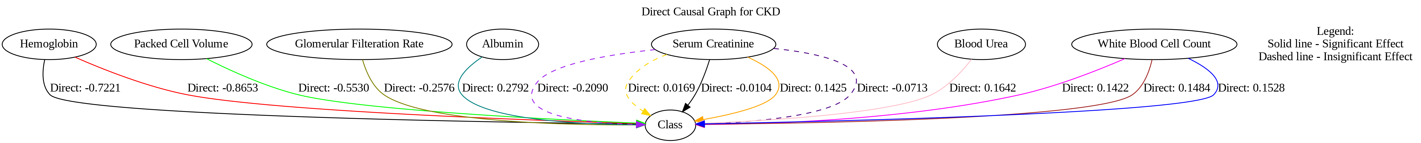

In [46]:
# Indirect Effects DAG
dot_indirect= Digraph("Indirect Effects")

# Set graph attributes for size and aspect ratio& better resolution
dot_indirect.attr(size= "20, 20", ratio= "expand", dpi= "300")

# Define the nodes for the indirect effects graph
dot_indirect.node("hemo", "Hemoglobin")
dot_indirect.node("pcv", "Packed Cell Volume")
dot_indirect.node("class", "Class")
dot_indirect.node("grf", "Glomerular Filteration Rate")
dot_indirect.node("al", "Albumin")
dot_indirect.node("sc", "Serum Creatinine")
dot_indirect.node("bu", "Blood Urea")
dot_indirect.node("wbcc", "White Blood Cell Count")

# Indirect effect
dot_indirect.edge("grf", "class", label= "Indirect: -0.3931", style= "solid", color= "black") # model 1
dot_indirect.edge("al", "class", label= "Indirect: -0.2498", style= "solid", color= "red") # model 2
dot_indirect.edge("bu", "class", label= "Indirect: 0.5425", style= "solid", color= "purple") # model 4
dot_indirect.edge("grf", "class", label= "Indirect: 0.3166", style= "solid", color= "gold") # model 5
dot_indirect.edge("pcv", "class", label= "Indirect: 0.3438", style= "sold", color= "navy") # model 6
dot_indirect.edge("al", "class", label= "Indirect: 0.1909", style= "solid", color= "orange") # model 7
dot_indirect.edge("hemo", "class", label= "Indirect: 0.4047", style= "solid", color= "indigo") # model 8
dot_indirect.edge("hemo", "class", label= "Indirect: 0.1418", style= "solid", color= "magenta") # model 9
dot_indirect.edge("grf", "class", label= "Indirect: 0.1356", style= "solid", color= "brown") # model 10
dot_indirect.edge("pcv", "class", label= "Indirect: 0.1312", style= "solid", color= "blue") # model 12
dot_indirect.edge("bu", "class", label= "Indirect: 0.0528", style= "solid", color= "teal") # model 14
dot_indirect.edge("al", "class", label= "Indirect: -0.0840", style= "solid", color= "olive") # model 15
dot_indirect.edge("grf", "class", label= "Indirect: -0.4245", style= "solid", color= "green") # model 16
dot_indirect.edge("al", "class", label= "Indirect: 0.1809", style= "solid", color= "pink") # model 17

# Add a simple legend
dot_indirect.node("Legend:\nSolid line - Significant Effect\nDashed line - Insignificant Effect", shape= "plaintext")

# Add a title
dot_indirect.attr(labelloc= "t", label= "Inirect Causal Graph for CKD")

# Save and render the combined graph
dot_indirect.render("Indirect Causal_Graph for CKD", format= "png", view= True)

'Indirect Causal_Graph for CKD.png'

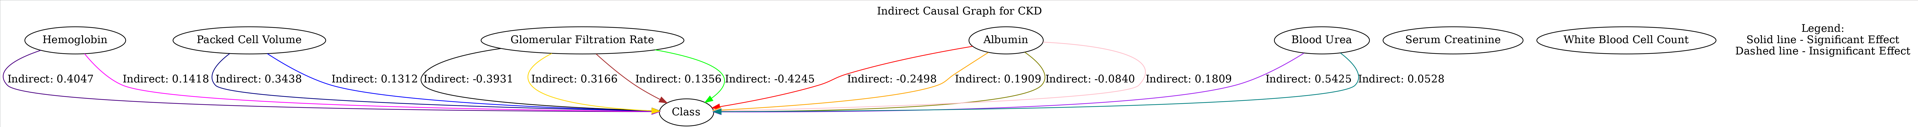

#**Split The Data**

In [ ]:
warnings.filterwarnings("ignore", category= ImportWarning)

# Split the data
from sklearn.model_selection import train_test_split

# Make a copy of the data
ml_data= df.copy()
ml_data

# Only use key features: grf, al, bu, hemo, pcv, sc, ane
# Define the key features to be kept
key_features= ["grf", "al", "bu", "hemo", "pcv", "sc", "ane"]
y= ml_data[["class"]]
x= ml_data.drop(columns= [col for col in ml_data.columns if col not in key_features])

# Ensure y is a 1D array & split teh data
y= y.values.ravel()
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

print("Standardisation Training set:", x_train.shape, y_train.shape)
print("Standardisation Testing set:", x_test.shape, y_test.shape)

Standardisation Training set: (159, 7) (159,)
Standardisation Testing set: (40, 7) (40,)


#**Build a Machine Learning Model With Logistic Regression**

In [ ]:
# Standardise the data
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

# Standardisation split
# Fit_transform the train set
# transform the test set
x_train_ss= ss.fit_transform(x_train)
x_test_ss= ss.transform(x_test)

In [ ]:
# Build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, classification_report

# Define the model
logit= LogisticRegression(penalty= "elasticnet", solver= "saga", l1_ratio= 0.5, random_state= 42, max_iter= 10000)

# Cross-validation scores
skf_logit= StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)
cv_scores_logit= cross_val_score(logit, x_train_ss, y_train, cv= skf_logit, scoring= "roc_auc")

print(f'Cross-validation AUC scores (Logistic Regression): {cv_scores_logit}')
print(f'Mean CV AUC score (Logistic Regression): {np.mean(cv_scores_logit):.2f}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cross-validation AUC scores (Logistic Regression): [0.97402597 1.         1.         0.98051948 1.        ]


<IPython.core.display.Javascript object>

Mean CV AUC score (Logistic Regression): 0.99


Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        17
         1.0       0.96      1.00      0.98        23

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

AUC-ROC: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

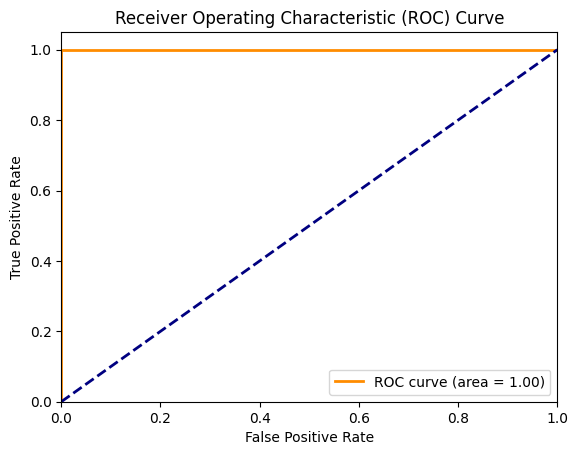

In [ ]:
# Fit the model with logistic regression
logit.fit(x_train_ss, y_train)

# Make predictions
y_pred_logit= logit.predict(x_test_ss)
y_pred_proba_logit= logit.predict_proba(x_test_ss)[:, 1]

# Evaluate the model
accuracy= accuracy_score(y_test, y_pred_logit)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_logit))

# Calculate AUC-ROC
auc_logit= roc_auc_score(y_test, y_pred_proba_logit)
print("AUC-ROC:", auc_logit)

# Plot ROC curve
fpr_logit, tpr_logit, thresholds= roc_curve(y_test, y_pred_proba_logit)
plt.figure()
plt.plot(fpr_logit, tpr_logit, color= "darkorange", lw= 2, label= f'ROC curve (area = {auc_logit:.2f})')
plt.plot([0, 1], [0, 1], color= "navy", lw= 2, linestyle= "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc= "lower right")
plt.show()

#**Observations**

While the clinical studies from Dimerix suggest that both glomerular filteration rate and proteinuria are the key indicator of kidney disease, however, we found that both glomerular filteration rate and blood urea are the obvious indicators of CKD in our case. Let understand these technical term.

(a) Glomerular filteration rate (GFR): GFR (in our dataset, it is grf) is the key measure of kidney fucntion that estimates how much blood the kidney filter per minutes. A normal GFR is typically above 90 mL/min/1.73m², with lower values indicating reduced kidney function or kidney disease. GFR is calculated using blood creatinine levels and other factors, and is crucial for detecting, staging, and monitoring kidney disease progression.

(b) Protenuria: A symptom refers to the presence of excess protein in the urine. Normally, proteins should be retained in the blood by the kidneys' filtering system, not in urine. Presence of protein in urine mean that the kidney could not perform properly, causing protein leaking into urine.

(c) Blood urea: Blood urea is a measure of how much waste product (urea) is in your blood, which comes from breaking down proteins. Kidneys are supposed to filter out this waste, so high levels of blood urea can indicate that the kidneys aren't working properly.

Despite both glomerular filteration rate and proteinuria are the best CKD indicator and are recognised by the industry, our dataset suggest that blood urea can also be an indicator of CKD.  

#**Comparison between Causal Analysis and PPS and Feature Importance**

When comparing mediation analysis to feature importance and predictive power score (PPS), we noticed that both feature importance and PPS successfully capture the important features within the dataset, what both of them couldn't do but causal inference could is to tell the influence one one features to another.

During the mediaton analysis, we begin to realised that both hemoglobin and packed cell volume (percentage of red cells in blood) have a strong significant direct relationship toward the risk of CKD. However, given that both hemogobin and packed cell volume can be influence by other factors such as: cardiovascular disease and cancer, carefully observe and evaluate health biomaker is crucial to avoid misdiagnosis.

On the other hand, while serum creatinine does not show a significant direct relationship toward the risk of CKD, however, through blood urea (bu), it appear that higher serum creatinine lead to higher blood urea, further leading to the increase of the risk of CKD.

One thing that mediation analysis captured and PPS and feature importance doesn't is that white blood cell count (wbcc) have significant impact to hemoglobin,  glomerular filteration rate and packed cell volume.


#**Wraping Up the Project- Using Keep It Simple, Simplicity Principles**

Glomerular filtration rate and proteinuria are the main indicators of CKD. However, this analysis shows that hemoglobin, packed cell volume, white blood cell count, and albumin are also useful for assessing overall health and CKD risk. Regular and close monitoring of these biomarkers can help catch health issues early and prevent severe and irreversible disease progression.



#**Summary**

When I first decided to work on this project, my interest was simply in studying a healthcare dataset. However, by working on this project, I have developed a deeper understanding of different health biomakers, which help me better in interpretating the reading of biomarker and the relationship between one and another.

Through this journey, I have learnt a couple of things, one of them I spent quite a bit of time is to think whether or not I am on the right path and the following 6 questions guided me along the way:

(a) What is the purpose of the project?

(b) What am I trying to achieve/ explore?

(c) Have I thoroughly understood the test and the requirements?

(d) Does the process flow/ test logic make sense to me?

(e) Have I achieved what I wanted to achieved? If not, what is the challenge? How can I get overcome it?

(f) How should I interpret the data? Am I interpret correctly? How is the interpretation related to the project's objective?

These questions served as a compass, helping me navigate through the complexities of this project. Looking back, this checklist not only test my understanding towards the objective of the project, more importantly, it challenges my logical thinking through the process of mediation analysis.


